In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 120

In [2]:
df_part_d = pd.read_csv('https://query.data.world/s/1jckku39d0p78m8jm1gnvww5t')
df_part_d.head(5)

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015"
0,10 WASH,SULFACETAMIDE SODIUM,24.0,1569.19,16.0,98.074375,5170.0,0.303518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2472.0,57666.73,893.0,64.576405,293160.0,0.196766,422.0,42.347204,471.0,7.545860,3486.0,75786.01,1261.0,60.099929,405484.0,0.186918,607.0,38.242323,654.0,6.501223,4413.0,95304.09,1633.0,58.361353,522780.0,0.182282,833.0,35.618511,800.0,5.880125,6788.0,150749.66,2769.0,54.441914,813255.0,0.185352,1481.0,32.143275,1288.0,5.132989,10749.0,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0.022208
2,ABILIFY DISCMELT,ARIPIPRAZOLE,4677.0,3929705.80,961.0,4089.183975,189351.5,20.753897,83.0,439.876386,878.0,22.165581,4705.0,4529795.27,915.0,4950.595924,192615.5,23.522216,89.0,440.755955,826.0,12.490230,5033.0,5221987.76,967.0,5400.194167,193300.0,27.019006,74.0,493.977297,893.0,12.986976,5186.0,6282391.38,951.0,6606.089779,198161.0,31.703590,85.0,546.043176,866.0,10.375242,2790.0,3735192.84,742.0,5033.952615,102764.0,36.344484,53.0,663.647358,689.0,18.064644,NaN
3,AK-PENTOLATE,CYCLOPENTOLATE HCL,730.0,6893.65,563.0,12.244494,2019.0,3.414388,369.0,7.194173,194.0,1.993557,320.0,3501.42,246.0,14.233415,852.0,4.109648,175.0,8.420971,71.0,3.000423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DDAVP,DESMOPRESSIN (NONREFRIGERATED),1044.0,599877.67,194.0,3092.152938,13261.0,45.236232,75.0,372.349733,119.0,14.688319,1001.0,664332.10,193.0,3442.135233,13440.0,49.429472,77.0,457.663766,116.0,21.710345,1032.0,886774.59,202.0,4389.973218,15312.0,57.913701,91.0,483.031099,111.0,16.434775,949.0,1029916.62,163.0,6318.506871,15115.0,68.138711,77.0,643.323766,86.0,11.626163,798.0,984371.25,138.0,7133.125000,13045.0,75.459659,62.0,659.737903,76.0,11.679605,NaN


Do a bit of cleaning:

In [3]:
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.strip())
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('HCL','HYDROCHLORIDE'))
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('PHOSP','PHOSPHATE'))

In [4]:
df_nda = pd.read_csv('https://query.data.world/s/ehr2lcy24q98ew9nnubyd4t73')
df_nda.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_e7af3676-cd9d-4c30-b127-9f6c46ff1589,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19510301.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_ad2261c2-3be8-4add-8274-0cc565d86ffb,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [5]:
df_nda['NONPROPRIETARYNAME'] = df_nda['NONPROPRIETARYNAME'].apply( lambda x: str(x).upper())
df_nda.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,FLORBETAPIR F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_e7af3676-cd9d-4c30-b127-9f6c46ff1589,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,QUINIDINE GLUCONATE,SOLUTION,INTRAVENOUS,19510301.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_ad2261c2-3be8-4add-8274-0cc565d86ffb,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,IXEKIZUMAB,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [6]:
df_generic_to_use = df_nda[['NONPROPRIETARYNAME','PHARM_CLASSES']].drop_duplicates()
df_generic_to_use.head()

,NONPROPRIETARYNAME,PHARM_CLASSES
0,FLORBETAPIR F 18,"Radioactive Diagnostic Agent [EPC],Positron Em..."
1,QUINIDINE GLUCONATE,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib..."
2,DULAGLUTIDE,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep..."
4,IXEKIZUMAB,"Interleukin-17A Antagonist [EPC],Interleukin-1..."
5,TESTOSTERONE,"Androgen [EPC],Androgen Receptor Agonists [MoA..."


In [7]:
df = pd.merge(left = df_part_d, right = df_generic_to_use,how='left',left_on='Generic Name',right_on='NONPROPRIETARYNAME')

In [8]:
df.sort_values(by='PHARM_CLASSES',inplace = True)
df.drop_duplicates(subset = ['Brand Name','Generic Name'],inplace=True)
df.head()

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015",NONPROPRIETARYNAME,PHARM_CLASSES
4388,ZYFLO CR,ZILEUTON,7478.0,5.142822e+06,1750.0,2938.755543,9.453600e+05,5.440067,817.0,503.209045,933.0,16.471961,7687.0,9.477538e+06,1734.0,5465.708431,9.893500e+05,9.579561,850.0,655.753659,884.0,13.664717,7413.0,1.516217e+07,1621.0,9353.590358,1.045439e+06,14.503161,904.0,709.687412,717.0,17.607894,6409.0,1.683369e+07,1291.0,13039.263292,9.139120e+05,18.419376,717.0,920.585439,574.0,13.952666,5188.0,1.774046e+07,1042.0,17025.395701,7.225070e+05,24.554035,576.0,1174.856441,466.0,17.853004,0.333055,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ..."
4387,ZYFLO,ZILEUTON,484.0,2.632957e+05,200.0,1316.478300,5.246700e+04,5.018310,86.0,308.680698,114.0,7.955263,623.0,6.703242e+05,182.0,3683.100000,6.814200e+04,9.837167,94.0,383.224043,88.0,7.897159,676.0,1.158369e+06,209.0,5542.437608,7.926100e+04,14.614621,113.0,441.129027,96.0,10.497292,784.0,1.812725e+06,225.0,8056.554711,9.875100e+04,18.356521,106.0,530.618868,119.0,11.141176,1256.0,4.051933e+06,423.0,9579.036998,1.653340e+05,24.507558,230.0,442.614478,193.0,5.556062,NaN,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ..."
3183,AVODART,DUTASTERIDE,1631984.0,2.529732e+08,300083.0,843.010792,6.899748e+07,3.666412,200809.0,270.093709,99274.0,25.873865,1533625.0,2.626614e+08,279995.0,938.093097,6.709854e+07,3.914562,190250.0,283.400822,89745.0,23.853139,1597133.0,3.040931e+08,293723.0,1035.305591,8.112729e+07,3.748345,209863.0,287.321800,83860.0,24.262862,1494976.0,3.183214e+08,277616.0,1146.624856,6.931393e+07,4.592460,200416.0,297.687050,77200.0,23.141024,1044439.0,2.525857e+08,222735.0,1134.018760,4.840088e+07,5.218618,157929.0,282.783150,64806.0,20.283508,0.136345,DUTASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu..."
302,DUTASTERIDE,DUTASTERIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138714.0,2.888796e+07,99047.0,291.659124,7.415621e+06,3.895555,72464.0,53.194215,26583.0,2.019110,NaN,DUTASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu..."
631,FINASTERIDE,FINASTERIDE,3392755.0,1.652143e+08,645474.0,255.958055,1.655944e+08,0.997704,493303.0,58.375047,152171.0,7.982504,3748171.0,1.242199e+08,728822.0,170.439353,1.900458e+08,0.653632,561719.0,53.357370,

In [9]:
df.shape,df_part_d.shape

((4498, 55), (4498, 53))

In [10]:
df['PHARM_CLASSES'].fillna('Unknown',inplace=True)

In [11]:
df[df['PHARM_CLASSES'] == 'Unknown']['Generic Name']

1                           PEN NEEDLE, DIABETIC
4                   CYCLOPENTOLATE HYDROCHLORIDE
5                 DESMOPRESSIN (NONREFRIGERATED)
7                      SULFURIC ACID/SULF PHENOL
10                 TETANUS AND DIPHTHERIA TOX/PF
11                 CHLORPHENIRAMINE/PHENYLEPH/DM
15                  CHLOR-MAL/PHENYLEPH/METHSCOP
17                BACITRACIN/POLYMYXIN B SULFATE
19                 PERIT. DIALYSIS#6 & DEX 1.5 %
20                                    PREDNISONE
26                   MEPERIDINE HYDROCHLORIDE/PF
29                    LIDOCAINE HYDROCHLORIDE/PF
36                VALPROIC ACID (AS SODIUM SALT)
38                VALPROIC ACID (AS SODIUM SALT)
43                          LEVOMEFOLATE CALCIUM
44         NETUPITANT/PALONOSETRON HYDROCHLORIDE
45                        LEVOMEFOLATE/ALGAL OIL
46                        CYTARABINE LIPOSOME/PF
53                 TRIAMCINOLONE/DIMETH/SILICONE
54                           DICLOFENAC/CAPSICUM
55                 T

In [12]:
df.to_csv('data/part_d_with_uses.csv')

We will group by the pharm_classes, and sum over the values (dropping averages, since they don't sum that way)

In [13]:
grouped = df.groupby('PHARM_CLASSES')
df_use_base = grouped.aggregate(np.nansum)
years = [2011,2012,2013,2014,2015]
averages_cols = ['Average Cost Per Unit (Weighted), ',
            'Average Beneficiary Cost Share No LIS, ',
            'Average Beneficiary Cost Share LIS, ']
df_use_base.drop([avg+str(yr) for yr in years for avg in averages_cols]
                 +['Brand Name','Generic Name',
                   'Annual Change in Average Cost Per Unit, 2015'],axis=1,inplace=True)

In [14]:
df_use_base.shape

(445, 35)

In [15]:
df_use_base.head()

,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Beneficiary Count No LIS, 2011","Beneficiary Count LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Beneficiary Count No LIS, 2012","Beneficiary Count LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Beneficiary Count No LIS, 2013","Beneficiary Count LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Beneficiary Count No LIS, 2014","Beneficiary Count LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Beneficiary Count No LIS, 2015","Beneficiary Count LIS, 2015"
PHARM_CLASSES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase Inhibitors [MoA],Decreased Leukotriene Production [PE]",7962.0,5.406118e+06,1950.0,4255.233843,9.978270e+05,903.0,1047.0,8310.0,1.014786e+07,1916.0,9148.808431,1.057492e+06,944.0,972.0,8089.0,1.632054e+07,1830.0,14896.027965,1.124700e+06,1017.0,813.0,7193.0,1.864641e+07,1516.0,21095.818003,1.012663e+06,823.0,693.0,6444.0,2.179239e+07,1465.0,26604.432699,8.878410e+05,806.0,659.0
"5-alpha Reductase Inhibitor [EPC],5-alpha Reductase Inhibitors [MoA]",5030612.0,4.190362e+08,947130.0,2103.836100,2.348624e+08,695061.0,251962.0,5287304.0,3.877246e+08,1010171.0,2223.340712,2.574083e+08,752804.0,257230.0,5960487.0,4.361689e+08,1170985.0,2386.623519,3.124059e+08,901569.0,269390.0,6307170.0,4.272494e+08,1276560.0,2112.467898,3.331540e+08,990204.0,286356.0,6619473.0,3.835684e+08,1469893.0,2428.968618,3.619368e+08,1138077.0,331816.0
"Acetyl Aldehyde Dehydrogenase Inhibitors [MoA],Aldehyde Dehydrogenase Inhibitor [EPC]",23339.0,2.887068e+06,7987.0,715.150400,7.801222e+05,2401.0,5586.0,24057.0,2.871170e+06,7149.0,795.013585,8.249415e+05,2533.0,4616.0,26051.0,3.012239e+06,7510.0,857.123733,8.987575e+05,3018.0,4492.0,26514.0,2.755405e+06,7486.0,768.675965,9.150344e+05,3264.0,4222.0,27870.0,2.704885e+06,7879.0,881.616864,9.837555e+05,3379.0,4466.0
"Acetylcholine Release Inhibitor [EPC],Acetylcholine Release Inhibitors [MoA]",5635.0,6.661903e+06,3051.0,3884.767180,1.181800e+04,1294.0,1727.0,7541.0,8.709997e+06,3981.0,3617.001597,1.479140e+04,1884.0,2097.0,11134.0,1.281318e+07,5688.0,3947.576300,2.111800e+04,2817.0,2871.0,14284.0,1.694227e+07,7051.0,5845.786390,2.620700e+04,3339.0,3712.0,17599.0,2.146734e+07,8311.0,7704.994357,3.167100e+04,3852.0,4459.0
"Acetylcholine Releasing Agent [EPC],Increased Acetylcholine Activity [PE]",34.0,2.016420e+03,0.0,0.000000,8.990000e+03,0.0,0.0,29.0,2.045950e+03,0.0,0.000000,9.060000e+03,0.0,0.0,20.0,1.647630e+03,0.0,0.000000,7.600000e+03,0.0,0.0,24.0,1.822860e+03,0.0,0.000000,8.752000e+03,0.0,0.0,34.0,1.944510e+03,0.0,0.000000,8.540000e+03,0.0,0.0


In [16]:
df_use_base.to_csv('data/part_D_aggregated_over_uses.csv')

Let's do some quick visualization:

In [17]:
columns_of_interest = ['Total Spending, ','Claim Count, ']
years = [2012,2013,2014,2015]
for column in columns_of_interest:
    df_use_base[column+'Max'] = np.abs(df_use_base[[column+str(yr) for yr in years]]).max(axis=1)

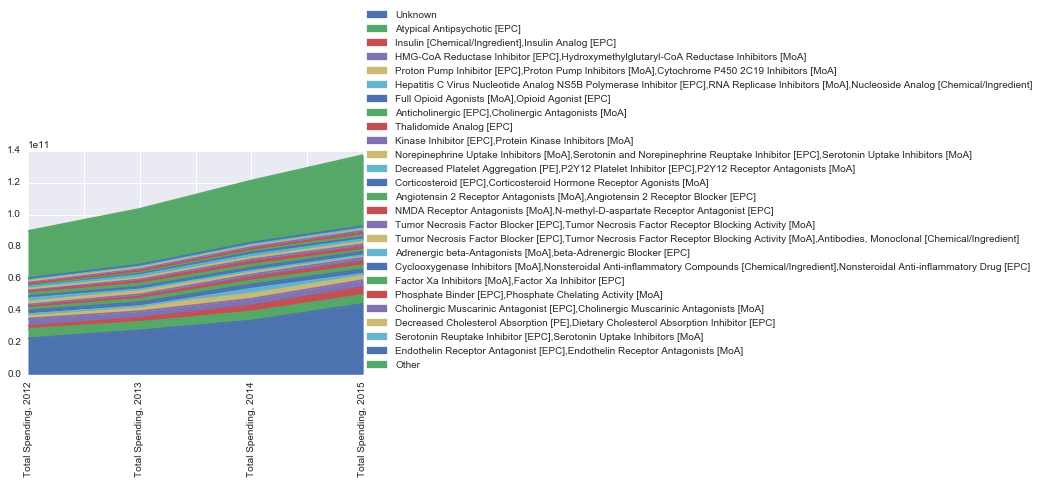

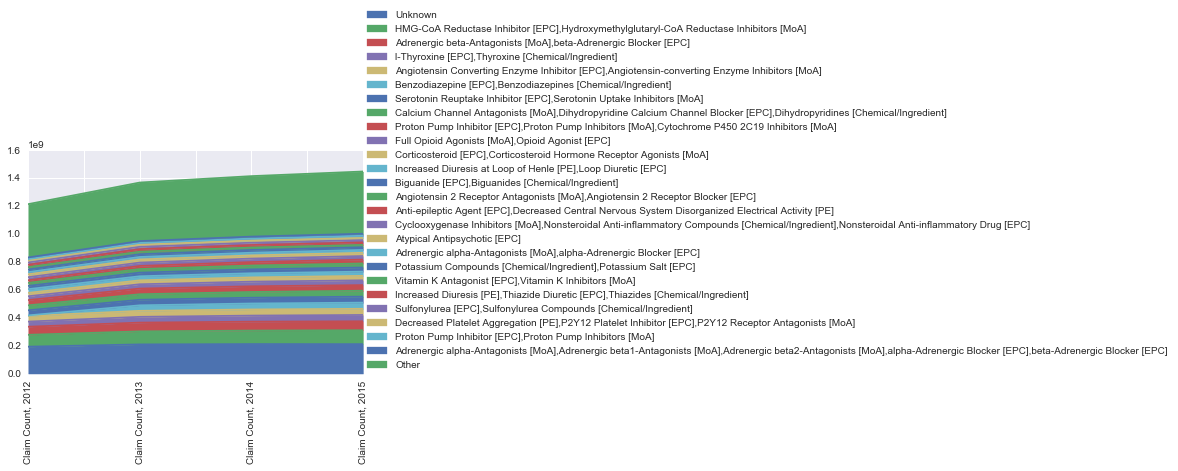

In [18]:
num_top = 25
for column in columns_of_interest:
    df_sorted = df_use_base.sort_values(by=column+'Max',ascending=False)
    
    
    #mask = (result['value'].div(result['value'].sum()).cumsum() < 0.9)
    result = df_sorted[:num_top].append(pd.Series(df_sorted[num_top:].sum(axis=0), name='Other'))

    #result[[column
    #         +str(yr) for yr in years]].plot.bar(figsize = (10,6))
    result[[column+str(yr) for yr in years]].transpose().plot.area()
    plt.legend(loc=(1,0))
    plt.xticks(rotation='vertical')
    plt.show()